In [1]:
!pip install requests

In [2]:
!git clone "https://github.com/Compfest-AIdea/machine-learning"

Cloning into 'machine-learning'...
remote: Enumerating objects: 398, done.
remote: Counting objects: 100% (398/398), done.
remote: Compressing objects: 100% (393/393), done.
remote: Total 398 (delta 23), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (398/398), 4.76 MiB | 17.34 MiB/s, done.
Resolving deltas: 100% (23/23), done.


# Analysis-Purpose

In [3]:
import tensorflow as tf
from tensorflow.keras.saving import load_model

model = load_model("/content/machine-learning/Models/hairloss_model.h5")

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                576       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3,844
Trainable params: 3,844
Non-trainable params: 0
_________________________________________________________________


In [5]:
import pandas as pd

df = pd.read_csv("/content/machine-learning/Dataset/Dataset-Tabular/hair_loss_aug.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   stay_up_late            432 non-null    int64
 1   coffee_consumed         432 non-null    int64
 2   brain_working_duration  432 non-null    int64
 3   pressure_level          432 non-null    int64
 4   stress_level            432 non-null    int64
 5   swimming                432 non-null    int64
 6   hair_washing            432 non-null    int64
 7   dandruff                432 non-null    int64
 8   hair_loss               432 non-null    int64
dtypes: int64(9)
memory usage: 30.5 KB


In [7]:
df

,stay_up_late,coffee_consumed,brain_working_duration,pressure_level,stress_level,swimming,hair_washing,dandruff,hair_loss
0,2,0,1,0,0,0,1,0,0
1,0,0,3,0,0,0,0,0,0
2,3,1,0,0,0,1,1,0,1
3,2,0,1,0,0,0,0,0,0
4,2,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
427,8,8,18,3,3,0,0,2,3
428,6,7,16,3,3,0,0,2,3
429,7,7,17,3,3,0,0,2,3
430,4,6,13,3,3,0,0,2,3


In [8]:
X_test = df.loc[:, df.columns != 'hair_loss']

In [9]:
X_test

,stay_up_late,coffee_consumed,brain_working_duration,pressure_level,stress_level,swimming,hair_washing,dandruff
0,2,0,1,0,0,0,1,0
1,0,0,3,0,0,0,0,0
2,3,1,0,0,0,1,1,0
3,2,0,1,0,0,0,0,0
4,2,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
427,8,8,18,3,3,0,0,2
428,6,7,16,3,3,0,0,2
429,7,7,17,3,3,0,0,2
430,4,6,13,3,3,0,0,2


In [10]:
y_test = df[['hair_loss']]

In [11]:
import numpy as np

y_pred = model.predict(X_test)

14/14 [==============================] - 0s 4ms/step


In [12]:
y_pred

array([[9.9581492e-01, 4.1794530e-03, 1.2156714e-06, 4.4224912e-06],
       [9.7772723e-01, 2.1830674e-02, 3.1421077e-04, 1.2773825e-04],
       [3.4500111e-08, 9.9999720e-01, 2.6979124e-06, 4.6054815e-08],
       ...,
       [2.6691023e-05, 1.0615499e-03, 1.2439831e-02, 9.8647195e-01],
       [6.9276241e-05, 1.8373411e-02, 6.5086178e-02, 9.1647112e-01],
       [6.9276241e-05, 1.8373411e-02, 6.5086178e-02, 9.1647112e-01]],
      dtype=float32)

In [13]:
y_class = np.argmax(y_pred, axis=1)

In [14]:
y_class

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,

In [15]:
unique_classes = y_test['hair_loss'].unique()
predicted_unique_classes = [unique_classes[idx] for idx in y_class]

In [16]:
print(predicted_unique_classes)

[0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Menghitung confusion matrix
cm = confusion_matrix(y_test, predicted_unique_classes,labels= unique_classes)

# Fungsi untuk menggambar confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

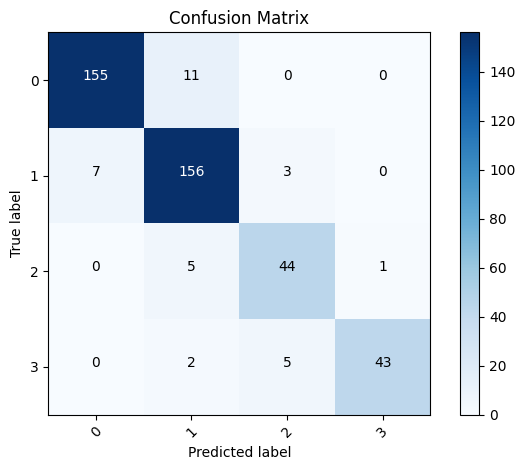

In [18]:
# Menampilkan confusion matrix
plt.figure()
plot_confusion_matrix(cm, unique_classes, normalize=False, title='Confusion Matrix')
plt.show()

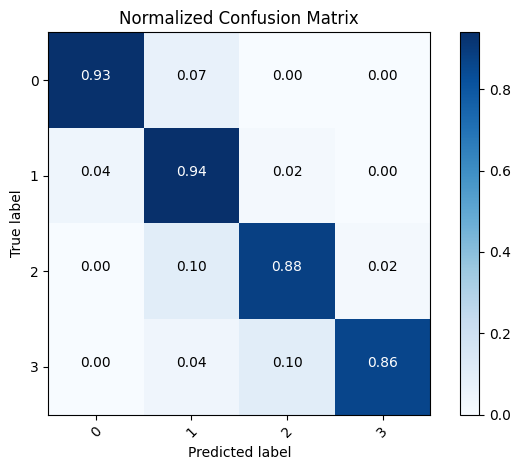

In [19]:
# Menampilkan confusion matrix
plt.figure()
plot_confusion_matrix(cm, unique_classes, normalize=True, title='Normalized Confusion Matrix')
plt.show()

# Deployment-Purpose

## Local

In [20]:
payload = {
    "stay_up_late": 3,
    "coffee_consumed": 1,
    "brain_working_duration": 0,
    "pressure_level": 0,
    "stress_level": 0,
    "swimming": 1,
    "hair_washing": 1,
    "dandruff": 0
}

In [21]:
payload

{'stay_up_late': 3,
 'coffee_consumed': 1,
 'brain_working_duration': 0,
 'pressure_level': 0,
 'stress_level': 0,
 'swimming': 1,
 'hair_washing': 1,
 'dandruff': 0}

In [22]:
single = pd.DataFrame(payload, index=[0])

In [23]:
type(single)

pandas.core.frame.DataFrame

In [24]:
y_pred_single = model.predict(single)

1/1 [==============================] - 0s 42ms/step


In [25]:
y_pred_single

array([[3.4500108e-08, 9.9999726e-01, 2.6979098e-06, 4.6054815e-08]],
      dtype=float32)

In [26]:
y_pred_single_class = np.argmax(y_pred_single, axis=1)
y_pred_single_value = np.max(y_pred_single)

In [27]:
y_pred_single_class

array([1])

In [28]:
y_pred_single_class[0]

1

In [29]:
y_pred_single_value

0.99999726

## Cloud

In [30]:
import requests
import json

url = 'https://asia-southeast2-united-triode-347813.cloudfunctions.net/hairloss-function'

# Send the POST request
response = requests.post(url, json=payload)

# Process the response
if response.status_code == 200:
    print("Request successful")
    print(response.json())
else:
    print("Request failed with status code:", response.status_code)

Request successful
{'data': {'prediction': {'label': 'Slight Hair Loss', 'percentage': 0.9999972581863403}}, 'message': 'Prediction successful', 'status': 'success'}


```
Struktur

input = {
    "stay_up_late": integer,
    "coffee_consumed": integer,
    "brain_working_duration": integer,
    "pressure_level": integer,
    "stress_level": integer,
    "swimming": integer,
    "hair_washing": integer,
    "dandruff": integer
}

response = {
    "status": "success",
    "message": "Prediction successful",
    "data": {
        "prediction": {
            "label": string,
            "percentage": float
        }
    }
}
```

